
#### Date created: 16/06/2025
#### Completed by Jasveer Govender

----

# **Topic: Monte-Carlo Simulations to compute VaR and Expected Shortfall**
<div class="alert alert-info ">
    <strong>Problem statement:</strong>

In simple terms: *We’re trying to answer the question: "If markets behave randomly based on historical returns, how bad could my losses get?"*

In this project, you will compute the following using Python:
- Historical VaR and CVaR
- Parametric VaR and CVaR
- Monte Carlo VaR and CVaR
</div>

<div class="alert alert-info ">
    <strong>Steps to perform for this project:</strong>

1. Import the libraries
2. Download the data
3. Analyze the returns distribution
4. Compute the historical VaR and C-VaR (Expected shortfall)
5. Compute the parametric VaR and C-VaR (Expected shortfall)
6. Scaling the VaR
7. Monte Carlo simulations
    </div>

<div class="alert alert-info ">
    <strong>Section Headings:</strong>

**Section 1: Data Collection**

**Section 2: Returns Distribution Analysis**

**Section 3: Historical VaR and CVaR**

**Section 4: Parametric VaR and CVaR**

**Section 5: Time-Scaled VaR**

**Section 6: Monte Carlo Simulation of VaR and CVaR**


----

### Key Definitions to know:

**Monte Carlo Simulation:** A method to simulate many possible outcomes using random sampling. Think of it like rolling dice many times to see all possible results.

**VaR (Value at Risk):** The loss level that is not expected to be exceeded with a certain confidence level. E.g., 95% VaR = “We expect not to lose more than this amount 95% of the time.”

**Expected Shortfall (ES):** The average loss that occurs in the worst-case scenarios (those beyond the VaR threshold). It gives a more complete picture of risk than VaR alone.

### **Section 1: Import the libraries**

Import the libraries with the aliases given in the brackets
 
- yfinance (yf)
- pandas (pd)
- numpy (np)
- matplotlib.pyplot (plt)
- datetime (dt)

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Run this before importing yfinance in Google Colab
# im using VS Code and already did this
#!pip install yfinance


In [3]:
# Import the libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# Settings the figsize parameter for the plots in this notebook to standardize the size of plots
plt.rcParams["figure.figsize"] = (15, 8)



---



### **Section 2: Analyze the returns distribution**

**Step 1**

In order to calculate returns, you'll first need stock price data. For this, you can fetch data from Yahoo Finance using `yfinance`.

Follow these steps:
1.   Set the parameters for start and end date, and the ticker.
2.   Import the data from Yahoo Finance using the `yfinance` library.
3.   Print a message saying '< n > number of records downloaded'.



In [5]:
'''
Enter the code for step 1 here
'''
start_date = "2020-01-01"
end_date = "2024-12-31"
ticker = "NVDA"

data = yf.download(ticker,start_date, end_date)
print(f"{len(data)} records downlaoded for {ticker}.")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

1257 records downlaoded for NVDA.


**Step 2**

Now that you've downloaded the data, you need to compute the simple daily returns.

Follow these steps:
1. Compute simple returns
2. Check the first five rows of the dataframe.
3. Check the last five rows of the dataframe.

In [6]:
'''
Enter the code for step 2 here
'''
data1 = data.droplevel(1,axis=1)
data1.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,5.971747,5.971747,5.892343,5.942873,237536000
2020-01-03,5.876164,5.919973,5.827127,5.852019,205384000
2020-01-06,5.900805,5.906032,5.756683,5.782819,262636000
2020-01-07,5.972244,6.018045,5.884128,5.929182,314856000
2020-01-08,5.983445,6.024765,5.927937,5.968012,277108000


In [7]:
# .pct_change() calculates the percentage change between the current and a prior element = Simple Return Formula
data1['simple_return'] = data1['Close'].pct_change()
print(data1.head())
print(data1.tail())

Price          Close      High       Low      Open     Volume  simple_return
Date                                                                        
2020-01-02  5.971747  5.971747  5.892343  5.942873  237536000            NaN
2020-01-03  5.876164  5.919973  5.827127  5.852019  205384000      -0.016006
2020-01-06  5.900805  5.906032  5.756683  5.782819  262636000       0.004193
2020-01-07  5.972244  6.018045  5.884128  5.929182  314856000       0.012107
2020-01-08  5.983445  6.024765  5.927937  5.968012  277108000       0.001875
Price            Close        High         Low        Open     Volume  \
Date                                                                    
2024-12-23  139.647446  139.767421  135.098177  136.257994  176053500   
2024-12-24  140.197372  141.877094  138.627618  139.977407  105157000   
2024-12-26  139.907410  140.827275  137.707768  139.677451  116205600   
2024-12-27  136.987869  138.997554  134.688253  138.527629  170582600   
2024-12-30  137.467804 

**HINT**:
You need to call the dot pct_change() method on the proper column.

**Step 3**

Let's now visualize the return distribution. For this, you will use the `hist` function from the `matplotlib.pyplot` module.
However, as we saw earlier, the first row of the returns contains null values. So we need to drop these before passing it to the `hist` function.
Setting bins equal to a large number will spread out your plot, but a low number will cause a lack of resolution.

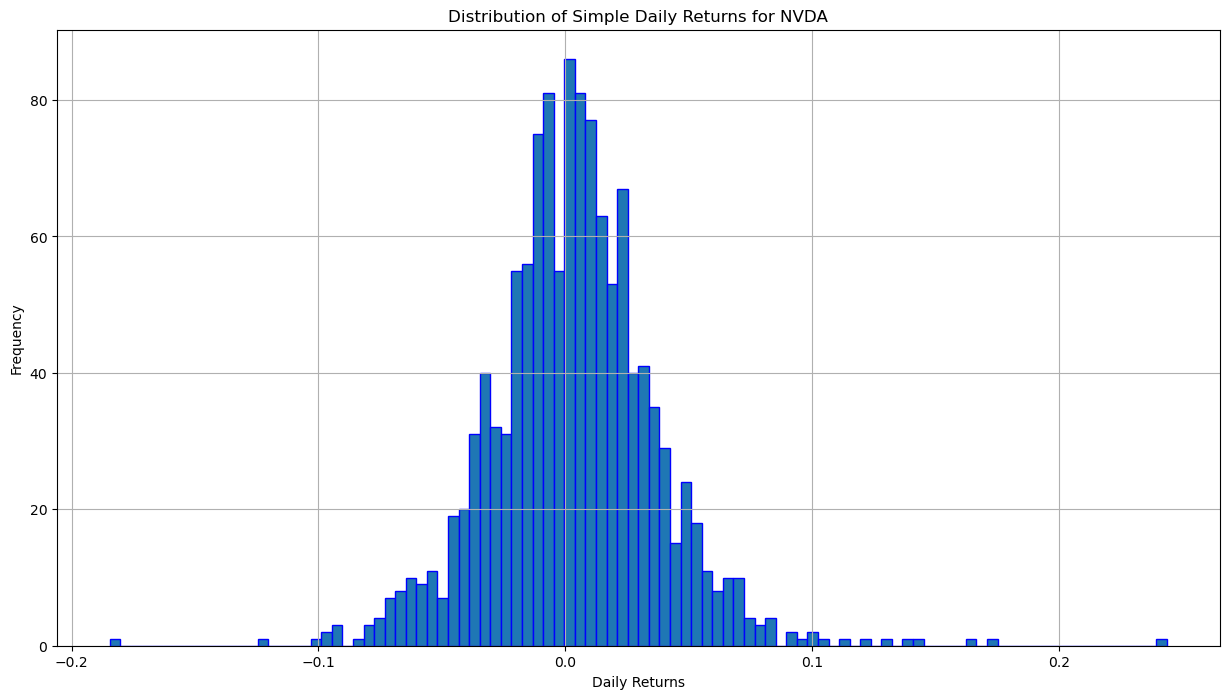

In [8]:
'''
Enter the code for step 3 here
'''
plt.hist(data1['simple_return'].dropna(), bins = 100, edgecolor = 'blue')
plt.title("Distribution of Simple Daily Returns for NVDA")
plt.xlabel("Daily Returns")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

From the Histogram above we notice that it is Normaly distributed (bell-shaped) with some extreme values on the tails - possible due to high-impact events (like earnings shocks or flash crashes).

Something to note, using **VaR** alone can be misleading - beacuse it assumes normality and underestimates tail risk.

**Step 4**

Now, you need to compute the mean and standard deviation of the returns. You also need to compute the annualized average returns using the formula below:

$\text{Average Annualized Return} = ( ( 1 + \mu ) ^ {252}) - 1$


Standard deviation for T time periods can be computed using the following formula:

$\sigma_{annual} = \sigma_{daily} * \sqrt{T}$

Follow these steps:
1. Compute the average daily returns and the annualized returns.
2. Compute the standard deviation of the returns and the annualized volatility.
3. Compute the annualized variance.
4. Compute the skewness and kurtosis of the returns.

In [ ]:
mu = data1['simple_return'].mean()
sigma = data1['simple_return'].std()
print(f"Mean of Simple Returns: {mu}")
print(f"Standard Deviation of Simple Returns: {sigma}")
print(f"Annualized Mean of Simple Returns: {mu * 252}")
print(f"Annualized Standard Deviation of Simple Returns: {sigma * np.sqrt(252)}")


Mean of Simple Returns: 0.0030708258530778923
Standard Deviation of Simple Returns: 0.0339458577603642
Annualized Mean of Simple Returns: 0.7738481149756289
Annualized Standard Deviation of Simple Returns: 0.5388737860481742


**HINT**: 
- You can use the np.mean() and np.std() functions to compute the mean and standard deviation of the returns.
- You can compute the annualized std by multiplying the daily std with the square root of 252.
- You can compute the annualized variance by squaring the annualized std.

Compute the skewness and excess kurtosis of returns using the **skew()** and **kurtosis()** functions from the **scipy.stats** library. 
Note: You need to add the necessary imports here.

In [10]:
# Calculate skewness and kurtosis
skewness = data1['simple_return'].skew
kurtosis = data1['simple_return'].kurtosis()

print(f"Skewness of Simple Returns: {skewness()}")
print(f"Kurtosis of Simple Returns: {kurtosis}")


Skewness of Simple Returns: 0.41412953454719015
Kurtosis of Simple Returns: 4.012152036248555


**HINT**: 
- This is the syntax: scipy.stats.skew(_Returns column_). Remember to drop the null values.
- This is the syntax: scipy.stats.kurtosis(_Returns column_). Remember to drop the null values.
    

**Step 5**

Check the normality of the stock returns distribution using the **Shapiro-Wilk test**. You can use the `shapiro()` function from the `scipy.stats` library.

The function will return two values- the first value is the t-stat of the test, and the second value is the p-value. You can use the p-value to assess the normality of the data. If the p-value is less than or equal to 0.05, you can  reject the null hypothesis of normality and assume that the data are non-normally distributed.

**What is the Shapiro-Wilk Test?**

    A statistical test used to check if your data is normally distributed.

    Null Hypothesis (H₀):Data is normally distributed.

    If p-value < 0.05, you reject H₀ → Data is not normal.

    If p-value ≥ 0.05 → fail to reject H₀ → Data could be normal.

In [11]:
# Import the shapiro function from the scipy.stats library
from scipy.stats import shapiro

# Compute the p_value by running the shapiro function on the returns column
stat, p_value = shapiro(data1['simple_return'].dropna())
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value <= 0.05:
    print("Null hypothesis of normality is rejected.")
else:
    print("Null hypothesis of normality is accepted.")

Shapiro-Wilk Test Statistic: 0.9663502130788784
P-value: 1.7568168598094173e-16
Null hypothesis of normality is rejected.


From the above result, given the p-value is less than 5% we reject the Null hypothesis as we have enough statistical eveidence to say that our distribution is **not normal** which validates using different methods like *Historical VaR, C-VaR and Monte Carlo.*



---


### **Section 3: Historical VaR and C-VaR (Expected shortfall)**

Value at Risk (VaR) is the maximum loss that one will not exceed with a certain probability α within a given time horizon. It is given as a threshold with a given confidence level that losses will not exceed at that level.

Conditional Value at Risk (CVaR), or Expected Shortfall, is an estimate of
expected losses sustained in the worst (1 - x)% of scenarios.

**Step 1**
1. Define the parameter for the confidence level for the VaR (say, 95).
2. Compute the historical VaR based on the significance level (1 - confidence_level).
3. Compute the historical CVaR based on the significance level (1 - confidence_level).

Historical VaR (95% Confidence): -0.05095


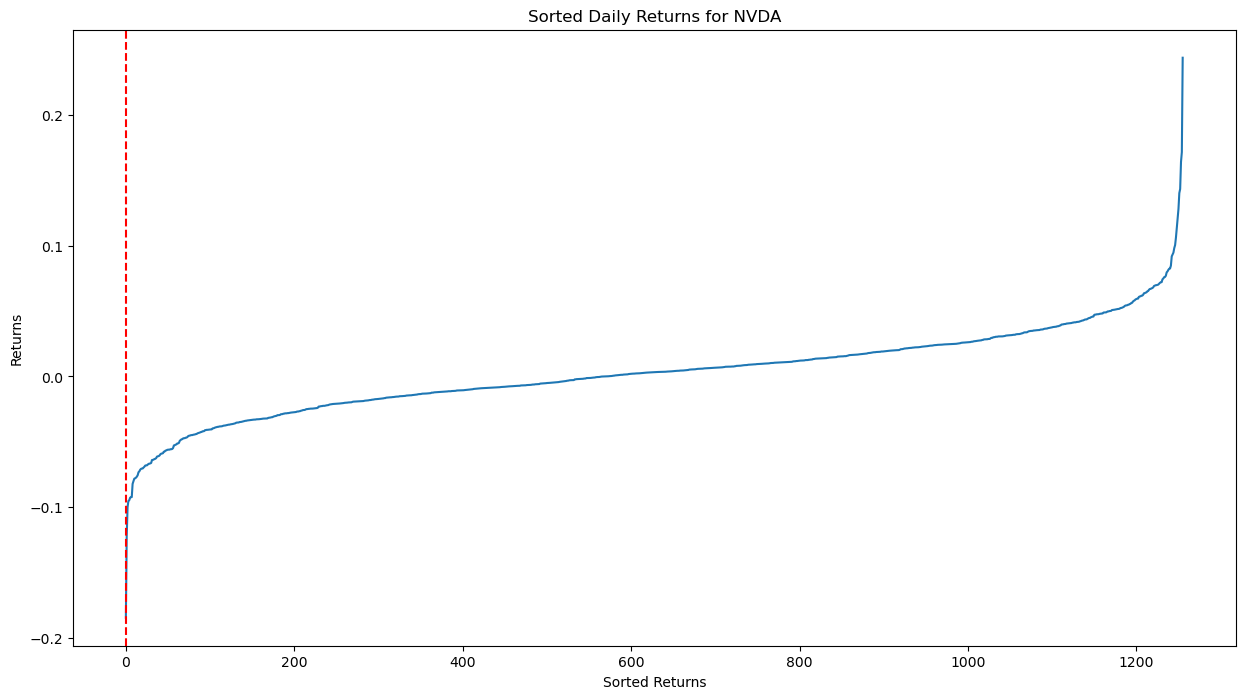

In [12]:
# Define the var level parameter
var_level = 95
confidence_level =  0.95
# Compute and print the historical VaR
var_95 = np.percentile(data1['simple_return'].dropna(), (1 - confidence_level) *100)
print(f"Historical VaR (95% Confidence): {var_95: .5f}")

# Sort the returns for plotting
sorted_returns = np.sort(data1['simple_return'].dropna())

# Plot the probability of each sorted return quantile 
plt.plot(sorted_returns)
plt.title("Sorted Daily Returns for NVDA")
plt.xlabel("Sorted Returns")
plt.ylabel("Returns")

# Draw a vertical line in the plot for the VaR 95 quantile
plt.axvline(x=var_95, color='red', linestyle='--', label=f'VaR {var_level}%: {var_95:.5f}')

**HINT**: You need to use the np.percentile() function. Remember, that you need to compute the lower 5% percentile for VaR(95).

    The X-axis shows all returns sorted from worst to best.

    The Y-axis is the return value.

    The red dashed line at ~ -5.1% shows the VaR at 95% confidence.

    Interpretation: 5% of the time, NVDA loses more than 5.1% in a day based on historical data.

**Step 2**

Compute the Expected Shortfall (CVaR) and plot the results.

Expected Shortfall (CvaR 95): -0.06943


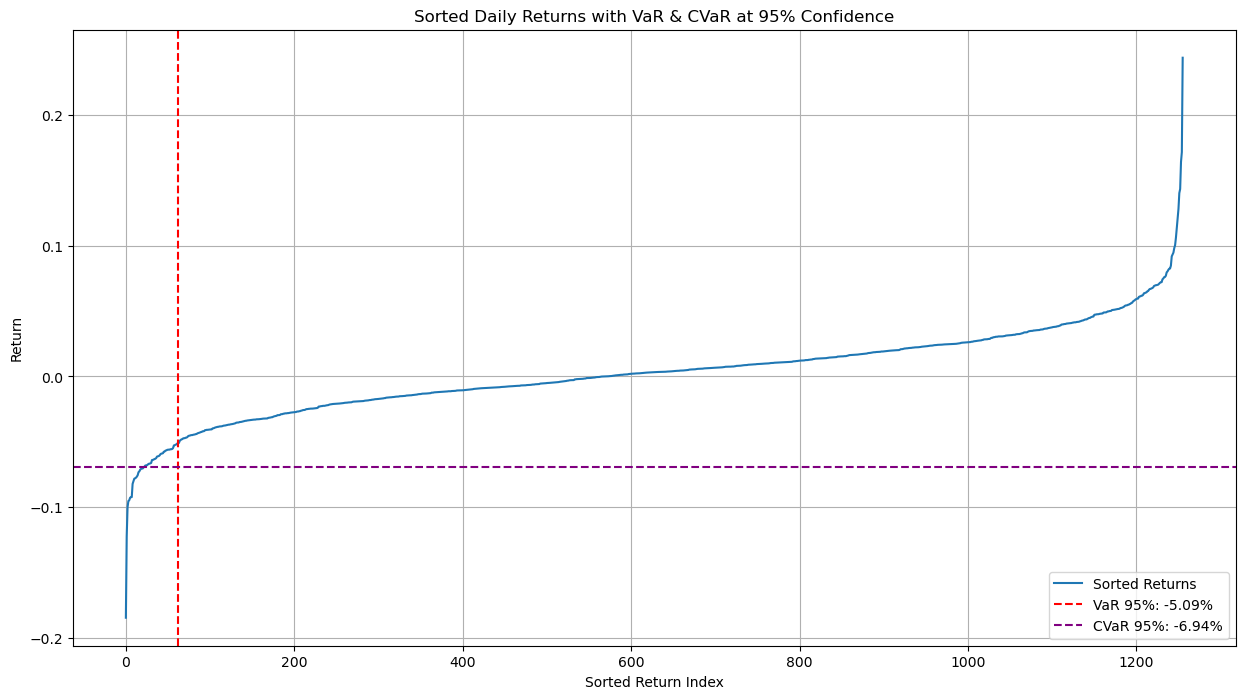

In [13]:
# Compute and print the expected shortfall
# filters all the returns less than or equal to the VaR value.
cvar_95 = data1[data1['simple_return'] <= var_95]['simple_return'].mean()
print(f"Expected Shortfall (CvaR 95): {cvar_95: .5f}")

# Sort the returns for plotting
#Takes all returns and drops any NaN values before sorting (smallest to largest)
sorted_returns = np.sort(data1['simple_return'].dropna())

# Plot the probability of each sorted return quantile
plt.plot(sorted_returns, label='Sorted Returns')

# Draw vertical lines in the plot for the VaR 95 and CVaR quantiles
#Adds a red vertical dashed line at the 5th percentile index (VaR)
plt.axvline(x=int(0.05 * len(sorted_returns)), color='red', linestyle='--', label=f'VaR 95%: {var_95:.2%}')
#Finding where in the sorted_returns list the CVaR value appears
#np.where(...) returns the index where it’s equal and then draw a vertical line at that index
cvar_index = np.where(sorted_returns == sorted_returns[sorted_returns <= var_95].mean())[0]
#Sometimes, the CVaR value doesn’t match exactly any value in the list (due to rounding or float precision). 
# In that case, we draw a horizontal line instead
if len(cvar_index) > 0:
    plt.axvline(x=cvar_index[0], color='purple', linestyle='--', label=f'CVaR 95%: {cvar_95:.2%}')
else:
    # fallback in case no exact match is found
    plt.axhline(y=cvar_95, color='purple', linestyle='--', label=f'CVaR 95%: {cvar_95:.2%}')

# Finishing touches
plt.title("Sorted Daily Returns with VaR & CVaR at 95% Confidence")
plt.xlabel("Sorted Return Index")
plt.ylabel("Return")
plt.legend()
plt.grid(True)
plt.show()


**HINT**: For expected shortfall, you need to take a mean of the returns lower than the VaR(95).

The above is a sorted plot of all daily returns for Nvidia over the last few years, from worst to best.

The red dashed line marks the Value at Risk (VaR) at a 95% confidence level. What this means is:

Based on historical data, we expect that on 95% of trading days, losses won't exceed this level — in this case, around 5.1%.

But VaR only tells us where the tail begins, not how bad things can get once we’re in it.

So we also calculate the Conditional Value at Risk (CVaR) — shown here as the purple line.

This represents the average loss on those worst 5% of days, and in this case, it’s approximately 6.9%.

This chart visually demonstrates our tail risk:

It quantifies the threshold of concern (VaR), and reveals the expected magnitude of losses beyond that point (CVaR).

For risk management and portfolio construction, this is critical — especially in volatile assets like NVDA. It helps us prepare not just for frequent losses, but also for rare but severe ones



---



### **Section 4: Parametric VaR and C-VaR (Expected shortfall)**


The **parametric method VAR** (also known as **Variance/Covariance VAR**) calculation is another commonly used form of VaR calculation. This method allows you to simulate a range of possibilities based on historical return distribution properties rather than actual return values.


You can use the `norm.ppf()` function from the `scipy.stats` library for this. You have already computed the mean and standard deviation of the returns earlier.

Parametric VaR:
VaRα = μ + zα * σ
VaRα ​= μ + zα * σ

Where:

    μ = mean return

    σ = std deviation

    zα = Z-score from normal distribution (e.g. -1.645 for 5% one-tailed)

In [14]:
# Import the necessary library
from scipy.stats import norm

# Set the confidence level for VaR(95)
confidence_level = 0.95
alpha =  1 - confidence_level

#Also need to calculate the mean and standard deviation of the simple returns
mu = data1['simple_return'].mean()
sigma = data1['simple_return'].std()

# Calculate the parametric VaR(95)
z_score = norm.ppf(alpha) # this gives us the z-value at 5% (≈ -1.645)
parametric_var = mu + z_score * sigma
print(f"Parametric VaR(95% Confidence): {parametric_var:.5f}")

Parametric VaR(95% Confidence): -0.05277


With 95% confidence, we do not expect to lose more than 5.28% in a single day under the assumption of normally distributed returns

**HINT**:  You can compute parametric VaR(90) using norm.ppf(confidence_level=0.10, mu, vol).

---



### Section 5: Scaling the VaR

The VaR calculated in the previous sections is simply the value at risk for a single day. To estimate the VaR for a longer time duration, scale the value by the square root of time, similar to scaling volatility.

The formula for this is:

 $\text{VaR}_{\text{t days}} = \text{VaR}_{\text{1 day}} * \sqrt{t}$

Based on the square-root-of-time rule, which is valid under the assumption that:

**Returns are independent and identically distributed (i.i.d.) & No compounding is considered**

 Using the above formula, let us see how VaR increases over the time for a period of an year.

 Follow these steps:

 1. Create an empty 2-d array of shape 252x2.
 2. In a for loop, iterate through all the values of days (1-252) and add the time to the first column of the array.
 3. Add the value of VaR for that time period to the second column of the array.
 4. Plot the results by passing the array to the function plot_var() defined below.

In [15]:
def plot_var(array):
  d = pd.DataFrame(abs(array))
  d[1].plot(xlabel='Time', ylabel='Forecasted VaR-95', title = "Time scaled VaR")
  plt.show()


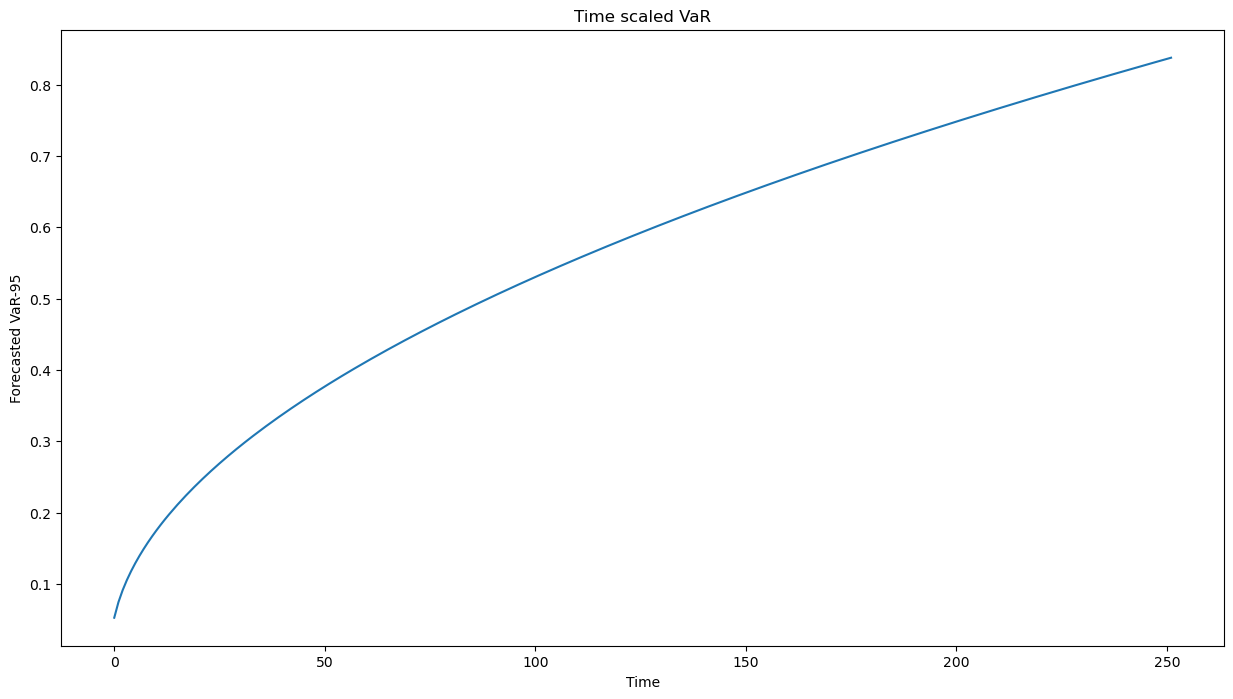

In [16]:
# Create an empty array to contain the VaR values
VaR_arr = np.empty([252, 2])

# Loop through the time period
for i in range(1,253):
  VaR_arr[i-1,0] = i # Day Number
  VaR_arr[i-1,1] = abs(parametric_var) * np.sqrt(i) #scaling the VaR value by the square root of time

# Plot the results
plot_var(VaR_arr)

**HINT**: VaR(t)= _VaR computed above_ * np.sqrt(t).

This chart shows how much risk builds up the longer you hold a position.
The curve illustrates our forecasted loss at a 95% confidence level, increasing over time.

While daily risk might seem manageable — say, 5% — that risk compounds over time.
After a year, the total potential downside could reach around 79% due to volatility accumulation.

### **Section 6: Monte Carlo simulations**

Follow these steps:

1. Set the seed for the random number generator so that our results are reproducible.
2. Compute the log returns.
3. Compute the mean, variance, and standard deviation of the log returns.

In [17]:
# 1. Set the random seed for reproducibility
np.random.seed(42)  # For reproducibility
#2. Compute log returns using the formula: log_return = log(current price / previous price)
data1['log_return'] = np.log(data1['Close'] / data1['Close'].shift(1))
data1.dropna(inplace=True)
#3. Calculate the mean and standard deviation of the log returns
mu = data1["log_return"].mean()
var = data1["log_return"].var()
sigma = data1["log_return"].std()


4. Compute the drift.
5. Initialize the following parameters for simulations
- n_days: the number of days
- n_sims: the number of simulations. Here, we will run 1000 simulations.
6. Compute the daily returns using the formula below:


${returns}_{daily} = {e^r}$

where, ${r}={drift}+{stdev*z}$

7. Compute the VaR(95) and cVaR(95).
8. Plot the simulations.

Monte Carlo VaR(95): -0.13296
Monte Carlo CVaR(95): -0.17261


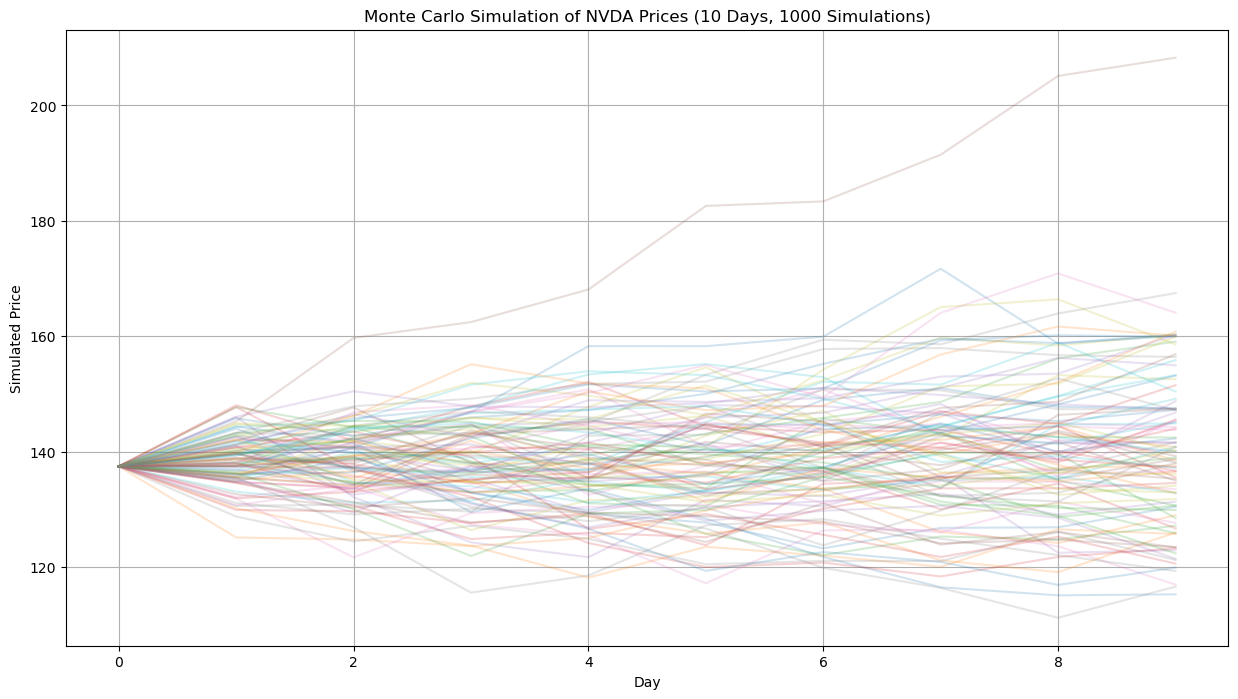

In [18]:
#4. Compute Drift
drift = mu - (0.5 * var)

#5. Set the number of days to simulate
n_days = 10
n_sims = 1000  # Number of simulations

# 6. Generate returns using formula: returns = exp(drift + sigma * random_normal)
Z = np.random.normal(size = (n_days, n_sims))
daily_returns = np.exp(drift + sigma * Z)

#7. Simulate price paths
S0 = data1['Close'].iloc[-1]  # Last known price
price_paths = np.zeros_like(daily_returns)
price_paths[0] = S0

for t in range(1, n_days):
    price_paths[t] = price_paths[t - 1] * daily_returns[t]

#8. Compute VaR(95) and CVaR(95)
final_prices = price_paths[-1]
returns = (final_prices - S0) / S0
var_95 = np.percentile(returns, 5)  # VaR at 95% confidence
cvar_95 = returns[returns <= var_95].mean()  # CVaR at 95% confidence


print(f"Monte Carlo VaR(95): {var_95:.5f}")
print(f"Monte Carlo CVaR(95): {cvar_95:.5f}")

# Plot the simulated price paths
plt.figure(figsize=(15, 8))
plt.plot(price_paths[:, :100], alpha=0.2)

plt.title("Monte Carlo Simulation of NVDA Prices (10 Days, 1000 Simulations)")
plt.xlabel("Day")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.show()

**HINT**:
- random_rets = np.random.normal(mean, std, T). Append the simulations to a list.
- var(90) = np.percentile(_simulations list_, 10).

This chart shows the result of running a Monte Carlo simulation on NVDA's stock price over the next 10 trading days.

Each line represents a possible future path that the stock could take, based on:

- the historical mean and volatility of log returns
- and a random shock component, which reflects market unpredictability.

We’ve run 1,000 simulations, and plotted a sample of 100 to avoid clutter.

All paths begin from today’s actual closing price — roughly $138 — and diverge over time.

This simulation assumes that:

- daily returns are normally distributed and follow a Geometric Brownian Motion, which is standard in finance for modeling asset prices.

From this simulation, we calculate:

- Monte Carlo VaR(95%) = –13.4%

- Monte Carlo CVaR(95%) = –17.6%

This tells us that:

**There's a 5% chance the stock could lose more than 13.4% over the next 10 days — and if that happens, the average loss would be around 17.6%.**

This Monte Carlo approach offers a forward-looking, probability-based view of risk — ideal for stress testing and scenario planning."

## Step 2

### Simulate the prices using Monte Carlo simulations.

1. Predict the prices. Set the value of the last adjusted close price as p0.
2. Initialize a numpy array of zeroes similar to the daily_returns computed above. You can use the function `np.zeros_like()`.
3. Set the initial value of the price as p0.
4. In a for loop for the number of days, we will fill the prices array with the prices computed from the `daily_returns` simulated above.
5. Convert the prices array to a dataframe.
6. Plot the simulations.

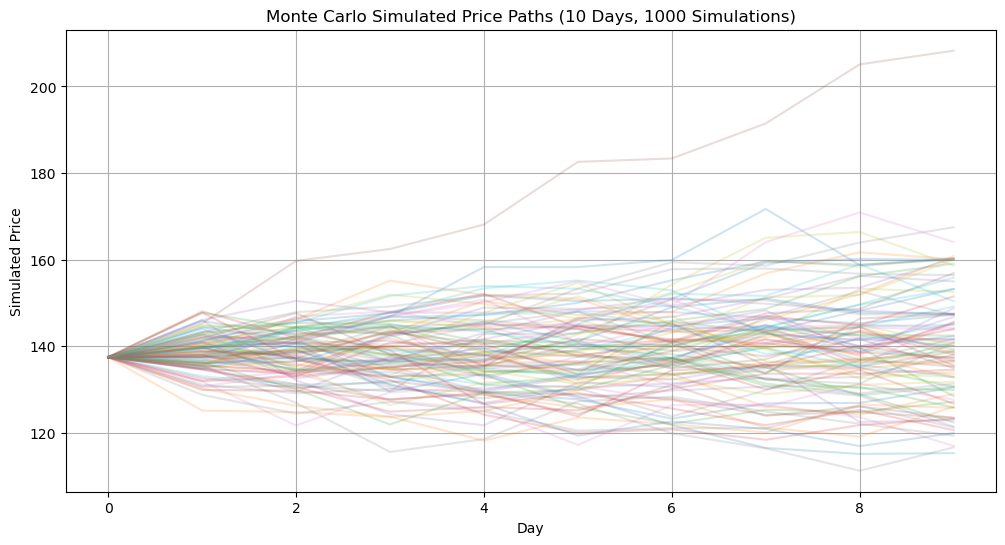

In [19]:
# Monte Carlo Simulation of Stock Prices
p0 = data1['Close'].iloc[-1]  # Last known price
prices = np.zeros_like(daily_returns)
#3. set initial price
prices[0] = p0
# 4 fills the price paths
for t in range(1, n_days):
    prices[t] = prices[t - 1] * daily_returns[t]

#5. Convert prices to dataframe
price_df = pd.DataFrame(prices)

#6. Plot the simulated price paths
plt.figure(figsize=(12,6))
plt.plot(price_df.iloc[:, :100], alpha=0.2)  # plot first 100 simulations
plt.title("Monte Carlo Simulated Price Paths (10 Days, 1000 Simulations)")
plt.xlabel("Day")
plt.ylabel("Simulated Price")
plt.grid(True)
plt.show()


This plot displays a Monte Carlo simulation of NVDA’s price over the next 10 days, based on its historical mean return and volatility.

Each path is generated using a geometric Brownian motion model, which assumes:

- Log returns are normally distributed

- Price evolves by compounding small random shocks each day

From this simulation, we can estimate the probability distribution of future outcomes. This gives us a forward-looking view of risk, allowing us to compute metrics like:

- VaR: What’s the worst loss we expect with 95% confidence?

- CVaR: And how bad could it get beyond that?

This simulation provides richer insight than historical or parametric VaR alone because it models a range of future outcomes, not just static thresholds.

# Final Summary

This notebook implemented three approaches to compute Value at Risk (VaR) and Expected Shortfall (CVaR) for NVDA stock:
- **Historical VaR/CVaR** (non-parametric)
- **Parametric VaR/CVaR** using normal assumptions
- **Monte Carlo simulation** of thousands of future price paths using drift and volatility

These methods provide both backward-looking and forward-looking perspectives on portfolio risk. Monte Carlo, in particular, allows stress testing over different time horizons with realistic randomness.

This project demonstrates core techniques in quantitative risk modeling using Python and can be applied to other financial instruments or portfolios.
